# Loss function

In [1]:
from sklearn.metrics import zero_one_loss,log_loss

def test_zero_one_loss():
    '''
    测试 0-1 损失函数
    :return: None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,0,1,1,1,1,1,0,0]
    print("zero_one_loss<fraction>:",zero_one_loss(y_true,y_pred,normalize=True))
    print("zero_one_loss<num>:",zero_one_loss(y_true,y_pred,normalize=False))

def test_log_loss():
    '''
    测试对数损失函数
    :return:  None
    '''
    y_true=[1, 1, 1, 0, 0, 0]
    y_pred=[[0.1, 0.9],
            [0.2, 0.8],
            [0.3, 0.7],
            [0.7, 0.3],
            [0.8, 0.2],
            [0.9, 0.1]]
    print("log_loss<average>:",log_loss(y_true,y_pred,normalize=True))
    print("log_loss<total>:",log_loss(y_true,y_pred,normalize=False))

if __name__=="__main__":
    test_zero_one_loss() # 调用 test_zero_one_loss
    test_log_loss() # 调用 test_log_loss

zero_one_loss<fraction>: 0.6
zero_one_loss<num>: 6
log_loss<average>: 0.228393003637
log_loss<total>: 1.37035802182


# Data split: Stratified可以避免某些不同label樣本數差異過大的偏誤

## train_test_split：會自己shuffle

In [10]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, cross_val_score
import numpy as np

def test_train_test_split():
    '''
    测试  train_test_split 的用法
    :return:  None
    '''
    X=[[1,2,3,4],
       [11,12,13,14],
       [21,22,23,24],
       [31,32,33,34],
       [41,42,43,44],
       [51,52,53,54],
       [61,62,63,64],
       [71,72,73,74]]
    y=[1,1,0,0,1,1,0,0]

    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, 
                                            random_state=0) # 切分，测试集大小为原始数据集大小的 40%
    print("X_train=",X_train)
    print("X_test=",X_test)
    print("y_train=",y_train)
    print("y_test=",y_test)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,
                                            random_state=0,stratify=y) # 分层采样切分，测试集大小为原始数据集大小的 40%
    print("Stratify:X_train=",X_train)
    print("Stratify:X_test=",X_test)
    print("Stratify:y_train=",y_train)
    print("Stratify:y_test=",y_test)

if __name__=='__main__':
    test_train_test_split() # 调用 test_train_test_split

X_train= [[31, 32, 33, 34], [1, 2, 3, 4], [51, 52, 53, 54], [41, 42, 43, 44]]
X_test= [[61, 62, 63, 64], [21, 22, 23, 24], [11, 12, 13, 14], [71, 72, 73, 74]]
y_train= [0, 1, 1, 1]
y_test= [0, 0, 1, 0]
Stratify:X_train= [[41, 42, 43, 44], [61, 62, 63, 64], [1, 2, 3, 4], [71, 72, 73, 74]]
Stratify:X_test= [[21, 22, 23, 24], [31, 32, 33, 34], [11, 12, 13, 14], [51, 52, 53, 54]]
Stratify:y_train= [1, 0, 1, 0]
Stratify:y_test= [0, 0, 1, 1]


## KFold: K等分

In [11]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, cross_val_score
import numpy as np


def test_KFold():
    '''
    测试  KFold 的用法
    :return: None
    '''
    X=np.array([[1,2,3,4],
       [11,12,13,14],
       [21,22,23,24],
       [31,32,33,34],
       [41,42,43,44],
       [51,52,53,54],
       [61,62,63,64],
       [71,72,73,74],
       [81,82,83,84]])
    y=np.array([1,1,0,0,1,1,0,0,1])

    folder = KFold(n_splits=3,random_state=0,shuffle=False) # 切分之前不混洗数据集，按照原本的順序
    for train_index,test_index in folder.split(X,y):
        print("Train Index:",train_index)
        print("Test Index:",test_index)
        print("X_train:",X[train_index])
        print("X_test:",X[test_index])
        print("")

    shuffle_folder = KFold(n_splits=3,random_state=0,shuffle=True) # 切分之前混洗数据集
    for train_index,test_index in shuffle_folder.split(X,y):
        print("Shuffled Train Index:",train_index)
        print("Shuffled Test Index:",test_index)
        print("Shuffled X_train:",X[train_index])
        print("Shuffled X_test:",X[test_index])
        print("")
            
def test_StratifiedKFold():
    '''
    测试  StratifiedKFold 的用法
    :return: None
    '''
    X=np.array([[1,2,3,4],
       [11,12,13,14],
       [21,22,23,24],
       [31,32,33,34],
       [41,42,43,44],
       [51,52,53,54],
       [61,62,63,64],
       [71,72,73,74]])

    y=np.array([1,1,0,0,1,1,0,0])

    folder=KFold(n_splits=4,random_state=0,shuffle=False)
    stratified_folder=StratifiedKFold(n_splits=4,random_state=0,shuffle=False)
    
    for train_index,test_index in folder.split(X,y):
        print("Train Index:",train_index)
        print("Test Index:",test_index)
        print("y_train:",y[train_index])
        print("y_test:",y[test_index])
        print("")

    for train_index,test_index in stratified_folder.split(X,y):
        print("Stratified Train Index:",train_index)
        print("Stratified Test Index:",test_index)
        print("Stratified y_train:",y[train_index])
        print("Stratified y_test:",y[test_index])
        print("")

if __name__=='__main__':
    test_KFold()# 调用 test_KFold
    test_StratifiedKFold()# 调用 test_StratifiedKFold

Train Index: [3 4 5 6 7 8]
Test Index: [0 1 2]
X_train: [[31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]
 [71 72 73 74]
 [81 82 83 84]]
X_test: [[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]]

Train Index: [0 1 2 6 7 8]
Test Index: [3 4 5]
X_train: [[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [61 62 63 64]
 [71 72 73 74]
 [81 82 83 84]]
X_test: [[31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]]

Train Index: [0 1 2 3 4 5]
Test Index: [6 7 8]
X_train: [[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]]
X_test: [[61 62 63 64]
 [71 72 73 74]
 [81 82 83 84]]

Shuffled Train Index: [0 3 4 5 6 8]
Shuffled Test Index: [1 2 7]
Shuffled X_train: [[ 1  2  3  4]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]
 [81 82 83 84]]
Shuffled X_test: [[11 12 13 14]
 [21 22 23 24]
 [71 72 73 74]]

Shuffled Train Index: [0 1 2 3 5 7]
Shuffled Test Index: [4 6 8]
Shuffled X_train: [[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [51 52 53 54

## LeaveOneOut: 用n-1個train，剩下的1個test

In [15]:
from sklearn.cross_validation import LeaveOneOut
import numpy as np

def test_LeaveOneOut():
    '''
    测试  LeaveOneOut 的用法
    :return: None
    '''
    X=np.array([[1,2,3,4],
               [11,12,13,14],
               [21,22,23,24],
               [31,32,33,34]])
    y=np.array([1,1,0,0])

    lo=LeaveOneOut(len(y))
    for train_index,test_index in lo:
        print("Train Index:",train_index)
        print("Test Index:",test_index)
        print("X_train:",X[train_index])
        print("X_test:",X[test_index])
        print("")

if __name__=='__main__':
    test_LeaveOneOut()# 调用 test_LeaveOneOut

Train Index: [1 2 3]
Test Index: [0]
X_train: [[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]
X_test: [[1 2 3 4]]

Train Index: [0 2 3]
Test Index: [1]
X_train: [[ 1  2  3  4]
 [21 22 23 24]
 [31 32 33 34]]
X_test: [[11 12 13 14]]

Train Index: [0 1 3]
Test Index: [2]
X_train: [[ 1  2  3  4]
 [11 12 13 14]
 [31 32 33 34]]
X_test: [[21 22 23 24]]

Train Index: [0 1 2]
Test Index: [3]
X_train: [[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]]
X_test: [[31 32 33 34]]



//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## cross_val_score: 給予estimator跟cv的切份數，返回每個切份的得分

In [16]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, cross_val_score
import numpy as np

def test_cross_val_score():
    '''
    测试  cross_val_score 的用法
    :return: None
    '''
    from sklearn.datasets import  load_digits
    from sklearn.svm import  LinearSVC

    digits=load_digits() # 加载用于分类问题的数据集
    X=digits.data
    y=digits.target

    result=cross_val_score(LinearSVC(),X,y,cv=10) # 使用 LinearSVC 作为分类器
    print("Cross Val Score is:",result)

if __name__=='__main__':
    test_cross_val_score()# 调用 test_cross_val_score

Cross Val Score is: [ 0.8972973   0.93989071  0.86187845  0.89444444  0.92178771  0.94413408
  0.96648045  0.94382022  0.85310734  0.94318182]


# Classification metrics

## accuracy_score: 只有比較單純對錯的統計

In [19]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import  SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np


def test_accuracy_score(): #只有單純比較對錯而已
    '''
    测试 accuracy_score 的用法
    :return: None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,1,1,0,0,1,1,0,0]
    print('Accuracy Score(normalize=True):',accuracy_score(y_true,y_pred,normalize=True)) #給出答對率
    print('Accuracy Score(normalize=False):',accuracy_score(y_true,y_pred,normalize=False)) #給出真正的答對題數

if __name__=='__main__':
    test_accuracy_score() # 调用 test_accuracy_score

Accuracy Score(normalize=True): 0.5
Accuracy Score(normalize=False): 5


## precision_score: 真正為1/預測為1的比例（positive predict rate）

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import  SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

def test_precision_score():
    '''
    测试 precision_score 的用法
    :return:  None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,1,1,0,0,0,0,0,0]
    print('Accuracy Score:',accuracy_score(y_true,y_pred,normalize=True))
    print('Precision Score:',precision_score(y_true,y_pred))    

if __name__=='__main__':
    test_precision_score() # 调用 test_precision_score

Accuracy Score: 0.7
Precision Score: 1.0


## recall_score: 預測為1/真正為1的比例（sensitivity）

In [21]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import  SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

def test_recall_score():
    '''
    测试 recall_score 的用法
    :return:  None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,1,1,0,0,0,0,0,0]
    print('Accuracy Score:',accuracy_score(y_true,y_pred,normalize=True))
    print('Precision Score:',precision_score(y_true,y_pred))
    print('Recall Score:',recall_score(y_true,y_pred))

if __name__=='__main__':
    test_recall_score() # 调用 test_recall_score

Accuracy Score: 0.7
Precision Score: 1.0
Recall Score: 0.4


## f1_score: precision/recall score的harmonic mean

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import  SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
    
def test_f1_score():
    '''
    测试 f1_score 的用法
    :return: None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,1,1,0,0,0,0,0,0]
    print('Accuracy Score:',accuracy_score(y_true,y_pred,normalize=True))
    print('Precision Score:',precision_score(y_true,y_pred))
    print('Recall Score:',recall_score(y_true,y_pred))
    print('F1 Score:',f1_score(y_true,y_pred))

if __name__=='__main__':
    test_f1_score() # 调用 test_f1_score

Accuracy Score: 0.7
Precision Score: 1.0
Recall Score: 0.4
F1 Score: 0.571428571429


## fbeta_score: beta用來取捨P(b小)和R(b大)，beta=1就是f1

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import  SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

def test_fbeta_score():
    '''
    测试 fbeta_score 的用法
    :return: None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,1,1,0,0,0,0,0,0]
    print('Accuracy Score:',accuracy_score(y_true,y_pred,normalize=True))
    print('Precision Score:',precision_score(y_true,y_pred))
    print('Recall Score:',recall_score(y_true,y_pred))
    print('F1 Score:',f1_score(y_true,y_pred))
    print('Fbeta Score(beta=0.001):',fbeta_score(y_true,y_pred,beta=0.001))
    print('Fbeta Score(beta=1):',fbeta_score(y_true,y_pred,beta=1))
    print('Fbeta Score(beta=10):',fbeta_score(y_true,y_pred,beta=10))
    print('Fbeta Score(beta=10000):',fbeta_score(y_true,y_pred,beta=10000))
    
if __name__=='__main__':
    test_fbeta_score() # 调用 test_fbeta_score

Accuracy Score: 0.7
Precision Score: 1.0
Recall Score: 0.4
F1 Score: 0.571428571429
Fbeta Score(beta=0.001): 0.999998500004
Fbeta Score(beta=1): 0.571428571429
Fbeta Score(beta=10): 0.402390438247
Fbeta Score(beta=10000): 0.4000000024


## classification_report

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import  SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
 
def test_classification_report():
    '''
    测试 classification_report 的用法
    :return:  None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,1,1,0,0,0,0,0,0]
    print('Classification Report:\n',classification_report(y_true,y_pred,
                                                           target_names=["class_0","class_1"])) #分別把0、1當作正項

if __name__=='__main__':
    test_classification_report() # 调用 test_classification_report

Classification Report:
              precision    recall  f1-score   support

    class_0       0.62      1.00      0.77         5
    class_1       1.00      0.40      0.57         5

avg / total       0.81      0.70      0.67        10



## confusion_matrix

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import  SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

def test_confusion_matrix():
    '''
    测试 confusion_matrix 的用法
    :return: None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,1,1,0,0,0,0,0,0]
    print('Confusion Matrix:\n',confusion_matrix(y_true,y_pred,labels=[0,1]))

if __name__=='__main__':
    test_confusion_matrix() # 调用 test_confusion_matrix

Confusion Matrix:
 [[5 0]
 [3 2]]


## precision_recall_curve

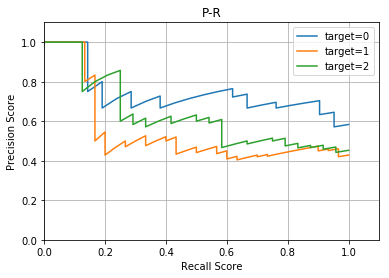

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import  SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
    
def test_precision_recall_curve():
    '''
    测试 precision_recall_curve 的用法，并绘制 P-R 曲线
    :return: None
    '''
    ### 加载数据
    iris=load_iris()
    X=iris.data
    y=iris.target
    
    # 二元化标记
    y = label_binarize(y, classes=[0, 1, 2])
    n_classes = y.shape[1]
    
    #### 添加噪音
    np.random.seed(0)
    n_samples, n_features = X.shape
    X = np.c_[X, np.random.randn(n_samples, 200 * n_features)]

    X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.5,random_state=0)
    
    ### 训练模型
    clf=OneVsRestClassifier(SVC(kernel='linear', probability=True,random_state=0))
    clf.fit(X_train,y_train)
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    
    ### 获取 P-R
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    precision = dict()
    recall = dict()
    
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
        ax.plot(recall[i],precision[i],label="target=%s"%i)
    ax.set_xlabel("Recall Score")
    ax.set_ylabel("Precision Score")
    ax.set_title("P-R")
    ax.legend(loc='best')
    ax.set_xlim(0,1.1)
    ax.set_ylim(0,1.1)
    ax.grid()
    plt.show()

if __name__=='__main__':
    test_precision_recall_curve() # 调用 test_precision_recall_curve

## roc_auc_score

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import  SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

def test_roc_auc_score():
    '''
    测试 roc_curve、roc_auc_score 的用法，并绘制 ROC 曲线
    :return: None
    '''
    
    ### 加载数据
    iris=load_iris()
    X=iris.data
    y=iris.target
    
    # 二元化标记
    y = label_binarize(y, classes=[0, 1, 2])
    n_classes = y.shape[1]
    
    #### 添加噪音
    np.random.seed(0)
    n_samples, n_features = X.shape
    X = np.c_[X, np.random.randn(n_samples, 200 * n_features)]

    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.5,random_state=0)
    
    ### 训练模型
    clf=OneVsRestClassifier(SVC(kernel='linear', probability=True,random_state=0))
    clf.fit(X_train,y_train)
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    
    ### 获取 ROC
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i],y_score[:, i])
        roc_auc[i] = roc_auc_score(fpr[i], tpr[i])
        ax.plot(fpr[i],tpr[i],label="target=%s,auc=%s"%(i,roc_auc[i]))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    ax.set_title("ROC")
    ax.legend(loc="best")
    ax.set_xlim(0,1.1)
    ax.set_ylim(0,1.1)
    ax.grid()
    plt.show()

if __name__=='__main__':
    test_roc_auc_score() # 调用 test_roc_auc_score

ValueError: continuous format is not supported

# regression_metrics: mae, mse

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def test_mean_absolute_error():
    '''
    测试 mean_absolute_error 的用法
    :return: None
    '''
    y_true=[1,1,1,1,1,2,2,2,0,0]
    y_pred=[0,0,0,1,1,1,0,0,0,0]

    print("Mean Absolute Error:",mean_absolute_error(y_true,y_pred))

def test_mean_squared_error():
    '''
    测试 mean_squared_error 的用法
    :return: None
    '''
    y_true=[1,1,1,1,1,2,2,2,0,0]
    y_pred=[0,0,0,1,1,1,0,0,0,0]

    print("Mean Absolute Error:",mean_absolute_error(y_true,y_pred))
    print("Mean Square Error:",mean_squared_error(y_true,y_pred))

if __name__=="__main__":
    test_mean_absolute_error() # 调用  test_mean_absolute_error()
    test_mean_squared_error() # 调用  test_mean_squared_error()

Mean Absolute Error: 0.8
Mean Absolute Error: 0.8
Mean Square Error: 1.2


# validation_curve: 驗證參數及其取值對score的影響

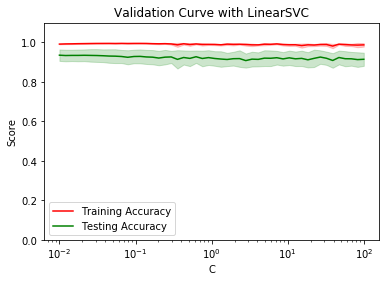

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC
from sklearn.learning_curve import validation_curve

def test_validation_curve():
    '''
    测试 validation_curve 的用法 。验证对于 LinearSVC 分类器 ， C 参数对于预测准确率的影响
    :return:  None
    '''
    ### 加载数据
    digits = load_digits()
    X,y=digits.data,digits.target
    
    #### 获取验证曲线 ######
    param_name="C"
    param_range = np.logspace(-2, 2)
    train_scores, test_scores = validation_curve(LinearSVC(), X, y, 
                                                 param_name=param_name, param_range=param_range,#就這行最重要
                                                 cv=10, scoring="accuracy")
    
    ###### 对每个 C ，获取 10 折交叉上的预测得分上的均值和方差 #####
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ####### 绘图 ######
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    ax.semilogx(param_range, train_scores_mean, label="Training Accuracy", color="r") #semilogx為對x軸取log為坐標
    ax.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    ax.semilogx(param_range, test_scores_mean, label="Testing Accuracy", color="g")
    ax.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")

    ax.set_title("Validation Curve with LinearSVC")
    ax.set_xlabel("C")
    ax.set_ylabel("Score")
    ax.set_ylim(0,1.1)
    ax.legend(loc='best')
    plt.show()

if __name__=='__main__':
    test_validation_curve() # 调用 test_validation_curve

# learning_curve：驗證data size對score的影響

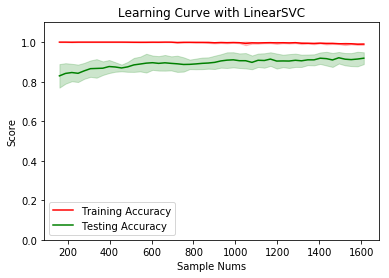

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC
from sklearn.learning_curve import learning_curve

def test_learning_curve():
    '''
    测试 learning_curve 的用法 。验证对于 LinearSVC 分类器 ，数据集的大小对于预测性能的影响
    :return:
    '''
    ### 加载数据
    digits = load_digits()
    X,y=digits.data,digits.target
    
    #### 获取学习曲线 ######
    train_sizes=np.linspace(0.1,1.0,endpoint=True,dtype='float')
    abs_trains_sizes, train_scores, test_scores = learning_curve(LinearSVC(),X, y,cv=10, 
                                                                 scoring="accuracy",train_sizes=train_sizes) #就這行最重要
    
    ###### 对每个 train_sizes ，获取 10 折交叉上的预测得分上的均值和方差 #####
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ####### 绘图 ######
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    ax.plot(abs_trains_sizes, train_scores_mean, label="Training Accuracy", color="r")
    ax.fill_between(abs_trains_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    ax.plot(abs_trains_sizes, test_scores_mean, label="Testing Accuracy", color="g")
    ax.fill_between(abs_trains_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")

    ax.set_title("Learning Curve with LinearSVC")
    ax.set_xlabel("Sample Nums")
    ax.set_ylabel("Score")
    ax.set_ylim(0,1.1)
    ax.legend(loc='best')
    plt.show()

if __name__=="__main__":
    test_learning_curve() # 调用 test_learning_curve

# grid_search: 試驗出最佳參數(param_grid用字典給出，key為名稱，value試驗值)

In [37]:
from sklearn.datasets import load_digits
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import scipy

def test_GridSearchCV():
    '''
    测试 GridSearchCV 的用法。使用 LogisticRegression 作为分类器，主要优化 C、penalty、multi_class 等参数
    :return: None
    '''
    
    ### 加载数据
    digits = load_digits()
    X_train,X_test,y_train,y_test=train_test_split(digits.data, digits.target,test_size=0.25,
                random_state=0,stratify=digits.target)
    
    #### 参数优化 ###### 使用字典形式
    tuned_parameters = [{'penalty': ['l1','l2'],
                        'C': [0.01,0.05,0.1,0.5,1,5,10,50,100],
                        'solver':['liblinear'],
                        'multi_class': ['ovr']},

                        {'penalty': ['l2'],
                        'C': [0.01,0.05,0.1,0.5,1,5,10,50,100],
                        'solver':['lbfgs'],
                        'multi_class': ['ovr','multinomial']},
                       ]
    clf=GridSearchCV(LogisticRegression(tol=1e-6),tuned_parameters,cv=10)
    clf.fit(X_train,y_train)
    print("Best parameters set found:",clf.best_params_)
    print("Grid scores:")
    
    for params, mean_score, scores in clf.grid_scores_:
        print("\t%0.3f (+/-%0.03f) for %s" % (mean_score, scores.std() * 2, params))

    print("Optimized Score:",clf.score(X_test,y_test))
    print("Detailed classification report:")
    
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))

def test_RandomizedSearchCV():
    '''
    测试 RandomizedSearchCV 的用法。使用 LogisticRegression 作为分类器，主要优化 C、multi_class 等参数。其中 C 的分布函数为指数分布
    :return:  None
    '''
    
    ### 加载数据
    digits = load_digits()
    X_train,X_test,y_train,y_test=train_test_split(digits.data, digits.target,
                test_size=0.25,random_state=0,stratify=digits.target)
    
    #### 参数优化 ######
    tuned_parameters ={ 'C': scipy.stats.expon(scale=100), # 指数分布
                        'multi_class': ['ovr','multinomial']}
    clf=RandomizedSearchCV(LogisticRegression(penalty='l2',solver='lbfgs',tol=1e-6),
                        tuned_parameters,cv=10,scoring="accuracy",n_iter=100)
    clf.fit(X_train,y_train)
    print("Best parameters set found:",clf.best_params_)
    print("Randomized Grid scores:")
    
    for params, mean_score, scores in clf.grid_scores_:
        print("\t%0.3f (+/-%0.03f) for %s" % (mean_score, scores.std() * 2, params))

    print("Optimized Score:",clf.score(X_test,y_test))
    print("Detailed classification report:")
    
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))

if __name__=='__main__':
    test_GridSearchCV()# 调用 test_GridSearchCV
    # test_RandomizedSearchCV() # 调用 test_RandomizedSearchCV

Best parameters set found: {'penalty': 'l2', 'C': 0.01, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Grid scores:
	0.930 (+/-0.031) for {'penalty': 'l1', 'C': 0.01, 'multi_class': 'ovr', 'solver': 'liblinear'}
	0.965 (+/-0.022) for {'penalty': 'l2', 'C': 0.01, 'multi_class': 'ovr', 'solver': 'liblinear'}
	0.964 (+/-0.022) for {'penalty': 'l1', 'C': 0.05, 'multi_class': 'ovr', 'solver': 'liblinear'}
	0.965 (+/-0.023) for {'penalty': 'l2', 'C': 0.05, 'multi_class': 'ovr', 'solver': 'liblinear'}
	0.965 (+/-0.024) for {'penalty': 'l1', 'C': 0.1, 'multi_class': 'ovr', 'solver': 'liblinear'}
	0.964 (+/-0.023) for {'penalty': 'l2', 'C': 0.1, 'multi_class': 'ovr', 'solver': 'liblinear'}
	0.958 (+/-0.030) for {'penalty': 'l1', 'C': 0.5, 'multi_class': 'ovr', 'solver': 'liblinear'}
	0.952 (+/-0.028) for {'penalty': 'l2', 'C': 0.5, 'multi_class': 'ovr', 'solver': 'liblinear'}
	0.951 (+/-0.025) for {'penalty': 'l1', 'C': 1, 'multi_class': 'ovr', 'solver': 'liblinear'}
	0.953 (+/-0.028) for {'p

//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
